#Source: https://github.com/spacewalk01/yolov5-fire-detection

In [1]:
import os,shutil

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [2]:
import torch
import os
import glob
from IPython.display import Image, display

#%cd yolov5
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [ ]:
# Clone
# %cd
#!git clone https://github.com/spacewalk01/Yolov5-Fire-Detection
#%cd Yolov5-Fire-Detection

Cloning into 'Yolov5-Fire-Detection'...
remote: Enumerating objects: 475, done.
remote: Counting objects: 100% (472/472), done.
remote: Compressing objects: 100% (204/204), done.
remote: Total 475 (delta 259), reused 454 (delta 250), pack-reused 3
Receiving objects: 100% (475/475), 47.35 MiB | 34.83 MiB/s, done.
Resolving deltas: 100% (259/259), done.
/content/Yolov5-Fire-Detection


#Install yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15996, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 15996 (delta 100), reused 121 (delta 76), pack-reused 15831
Receiving objects: 100% (15996/15996), 14.65 MiB | 21.40 MiB/s, done.
Resolving deltas: 100% (10969/10969), done.
/content/Yolov5-Fire-Detection/yolov5/yolov5


In [ ]:
!ls

benchmarks.py	 data	     LICENSE	  README.zh-CN.md   train.py
CITATION.cff	 detect.py   models	  requirements.txt  tutorial.ipynb
classify	 export.py   __pycache__  segment	    utils
CONTRIBUTING.md  hubconf.py  README.md	  setup.cfg	    val.py


# Train YOLOv5 model

In [ ]:
%cd /content/drive

/content/drive


In [ ]:
!python MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/train.py --img 640 --batch 16 --epochs 3 --data MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/datasets/fire_config.yaml --weights MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/yolov5s.pt --workers 1

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

In [ ]:
!cp drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/utils/plots.py .

In [ ]:
from plots import plot_results
plot_results('MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/train/exp2/results.csv')

### Prediction on Images

In [3]:
!pip install ultralytics

In [4]:
!python /content/drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/detect.py --weights /content/drive/MyDrive/ColabNotebooks/fire-detection/yolov5l.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/ColabNotebooks/fire-detection/inputs/image #fire/val/images/

detect: weights=['/content/drive/MyDrive/ColabNotebooks/fire-detection/yolov5l.pt'], source=/content/drive/MyDrive/ColabNotebooks/fire-detection/inputs/image, data=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-6-18 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46113663 parameters, 0 gradients
image 1/8 /content/drive/MyDrive/ColabNotebooks/fire-detection/inputs/image/img1.jpg: 640x512 (no detections), 171.9ms
image 2/8 /c

In [5]:
#display inference on some test images
images = glob.glob('drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect/exp12/*.jpg')

for imageName in images[:7]: #assuming JPG
  display(Image(filename=imageName, width=400))

Output hidden; open in https://colab.research.google.com to view.

### Prediction on Video

In [ ]:
!python drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/detect.py --weights drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/models/best.pt --img 640 --conf 0.25 --source drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/input.mp4

detect: weights=['drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/models/best.pt'], source=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/input.mp4, data=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-6-18 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
video 1/1 (1/190) /content/drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-ma

In [ ]:
import cv2
vidcap = cv2.VideoCapture('drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect/exp4/input.mp4')
success,image = vidcap.read()
images = []
while success:
    success,image = vidcap.read()
    if success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)

In [ ]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt

rc('animation', html='jshtml')

def create_animation(ims):
    fig = plt.figure(figsize=(9, 9))
    plt.axis('off')
    im = plt.imshow(ims[0])

    def animate_func(i):
        im.set_array(ims[i])
        return [im]

    return animation.FuncAnimation(fig, animate_func, frames = len(ims), interval = 1000//12)

create_animation(images)

# Visualize feature map

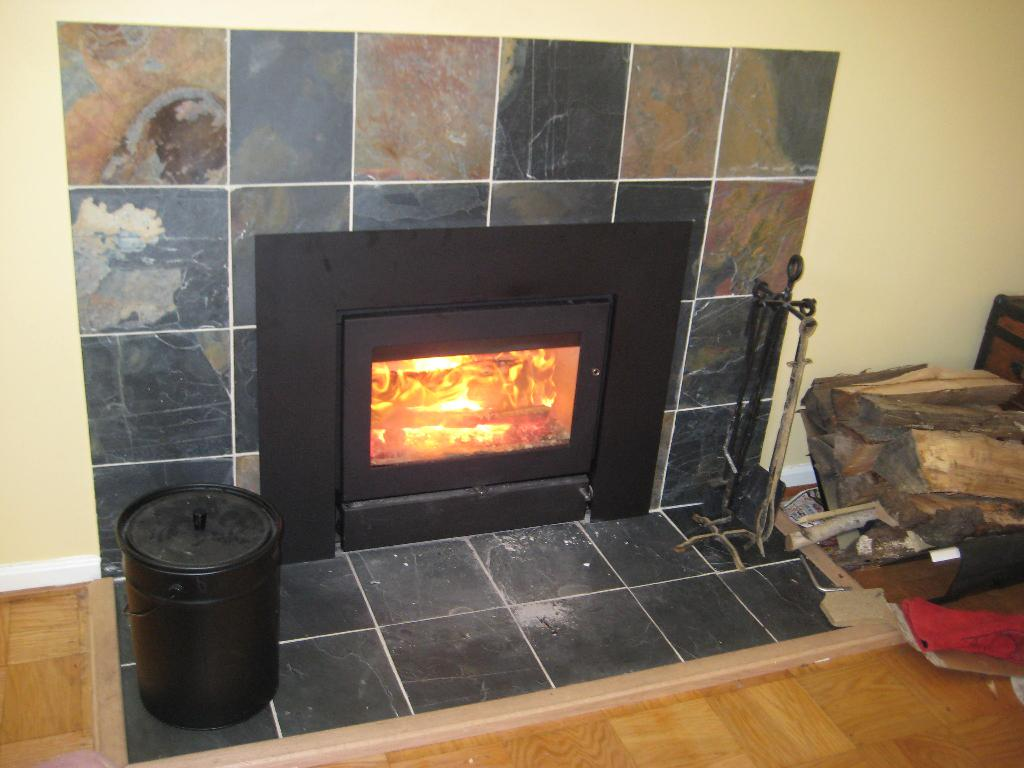

In [ ]:
image_path = "drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/datasets/fire/val/images/004dec94c5de631f.jpg"
display(Image(filename=image_path, width=400))

In [ ]:
!python drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/detect.py --weights drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/models/best.pt --img 640 --conf 0.25 --source {image_path} --visualize

detect: weights=['drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/models/best.pt'], source=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/datasets/fire/val/images/004dec94c5de631f.jpg, data=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-6-18 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Saving drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fi

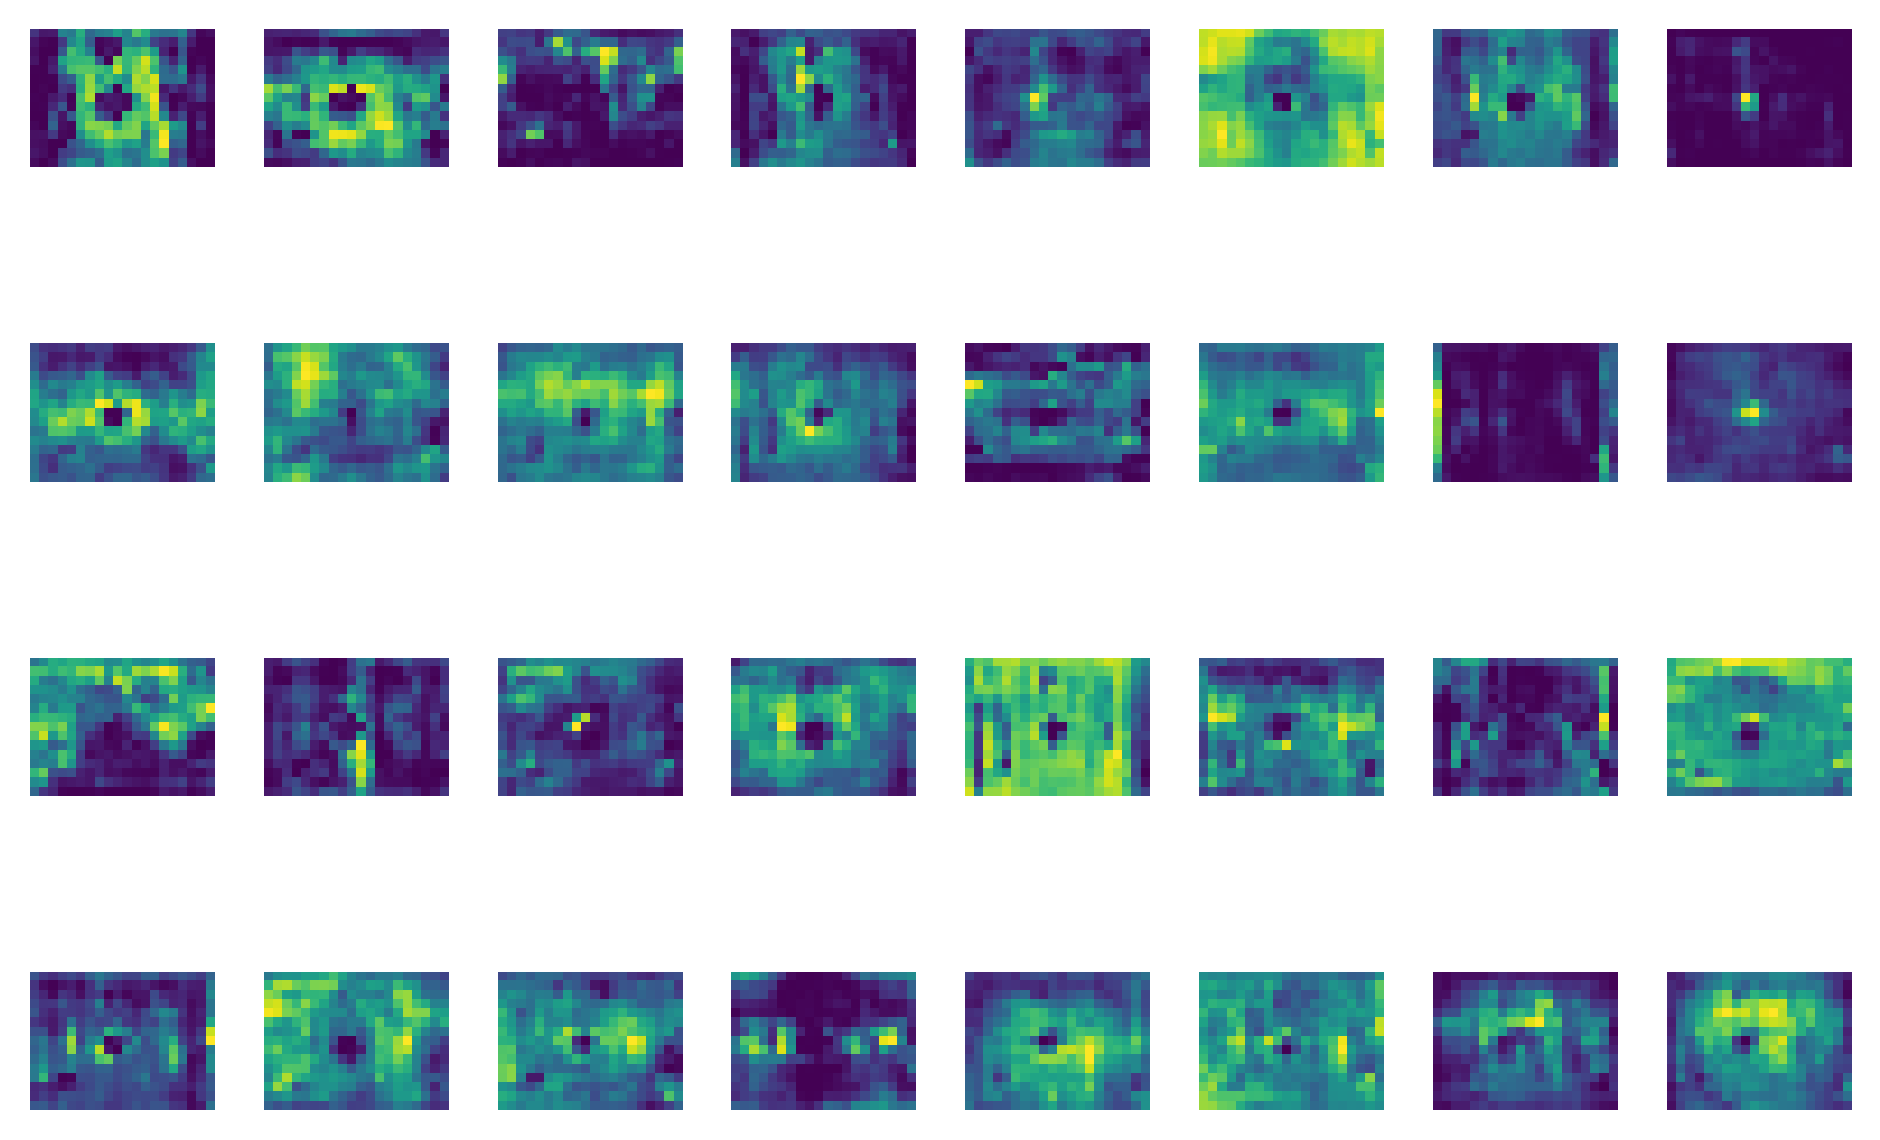

In [ ]:
display(Image(filename="drive/MyDrive/ColabNotebooks/fire-detection/yolov5-fire-detection-main/yolov5/runs/detect/exp5/004dec94c5de631f/stage23_C3_features.png"))